In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ign-games/ign.csv


In [3]:
df = pd.read_csv("/kaggle/input/ign-games/ign.csv")
df.head(5)

Unnamed: 0 score_phrase                                              title  \
0           0      Amazing                            LittleBigPlanet PS Vita   
1           1      Amazing  LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2           2        Great                               Splice: Tree of Life   
3           3        Great                                             NHL 13   
4           4        Great                                             NHL 13   

                                                 url          platform  score  \
0             /games/littlebigplanet-vita/vita-98907  PlayStation Vita    9.0   
1  /games/littlebigplanet-ps-vita-marvel-super-he...  PlayStation Vita    9.0   
2                          /games/splice/ipad-141070              iPad    8.5   
3                      /games/nhl-13/xbox-360-128182          Xbox 360    8.5   
4                           /games/nhl-13/ps3-128181     PlayStation 3    8.5   

        genre editors_choice  release_year  release_month  release_day  
0  Platformer              Y          2012              9           12  
1  Platformer              Y          2012              9           12  
2      Puzzle              N          2012              9           12  
3      Sports              N          2012              9           11  
4      Sports              N          2012              9           11

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['url'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   score_phrase    18625 non-null  object 
 1   title           18625 non-null  object 
 2   platform        18625 non-null  object 
 3   score           18625 non-null  float64
 4   genre           18589 non-null  object 
 5   editors_choice  18625 non-null  object 
 6   release_year    18625 non-null  int64  
 7   release_month   18625 non-null  int64  
 8   release_day     18625 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.3+ MB


In [6]:
df.head()

score_phrase                                              title  \
0      Amazing                            LittleBigPlanet PS Vita   
1      Amazing  LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2        Great                               Splice: Tree of Life   
3        Great                                             NHL 13   
4        Great                                             NHL 13   

           platform  score       genre editors_choice  release_year  \
0  PlayStation Vita    9.0  Platformer              Y          2012   
1  PlayStation Vita    9.0  Platformer              Y          2012   
2              iPad    8.5      Puzzle              N          2012   
3          Xbox 360    8.5      Sports              N          2012   
4     PlayStation 3    8.5      Sports              N          2012   

   release_month  release_day  
0              9           12  
1              9           12  
2              9           12  
3              9           11  
4              9           11

In [7]:
import matplotlib.pyplot as plt

### No. of games vs score_phrase

In [8]:
score = df['score_phrase'].value_counts()
score

score_phrase
Great          4773
Good           4741
Okay           2945
Mediocre       1959
Amazing        1804
Bad            1269
Awful           664
Painful         340
Unbearable       72
Masterpiece      55
Disaster          3
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Great'),
  Text(1, 0, 'Good'),
  Text(2, 0, 'Okay'),
  Text(3, 0, 'Mediocre'),
  Text(4, 0, 'Amazing'),
  Text(5, 0, 'Bad'),
  Text(6, 0, 'Awful'),
  Text(7, 0, 'Painful'),
  Text(8, 0, 'Unbearable'),
  Text(9, 0, 'Masterpiece'),
  Text(10, 0, 'Disaster')])

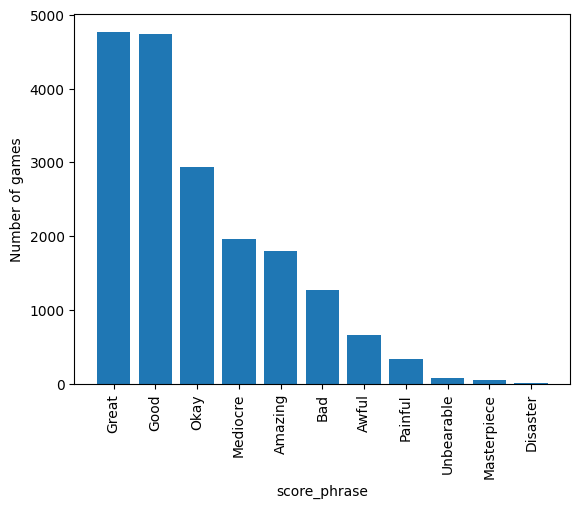

In [9]:
plt.bar(score.index, score.values)
plt.xlabel("score_phrase")
plt.ylabel("Number of games")
plt.title("")
plt.xticks(rotation=90)

### Top 10 platforms used

In [12]:
df['platform'].value_counts().sort_values(ascending=False)[:10]

platform
PC               3370
PlayStation 2    1686
Xbox 360         1631
Wii              1366
PlayStation 3    1356
Nintendo DS      1045
PlayStation       952
Wireless          910
iPhone            842
Xbox              821
Name: count, dtype: int64

### No. of games which scores above 8

In [19]:
df[df['score'] >= 8].count()[0]

6632

In [21]:
score_vs_counts = df['score'].value_counts()
score_vs_counts

score
8.0    1758
7.0    1573
7.5    1086
8.5    1026
6.0     994
       ... 
1.8       1
1.1       1
1.3       1
0.7       1
0.8       1
Name: count, Length: 93, dtype: int64

Text(0.5, 1.0, 'No. of games vs score')

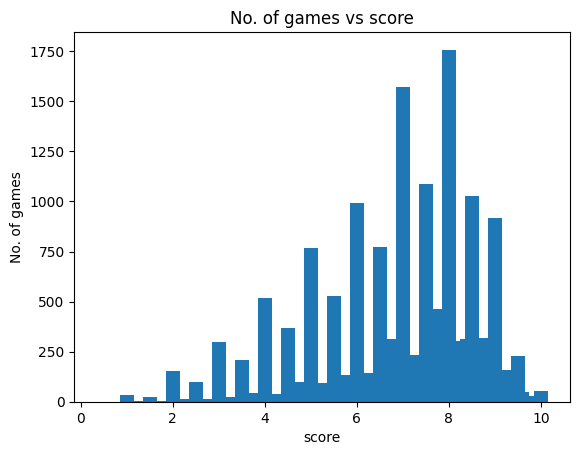

In [25]:
plt.bar(score_vs_counts.index, score_vs_counts.values, width=0.3)
plt.xlabel("score")
plt.ylabel("No. of games")
plt.title("No. of games vs score")

### Top 10 genre

In [29]:
distribution_of_genre = df['genre'].value_counts()[:10]
distribution_of_genre

genre
Action               3797
Sports               1916
Shooter              1610
Racing               1228
Adventure            1175
Strategy             1071
RPG                   980
Platformer            823
Puzzle                776
Action, Adventure     765
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 genres')

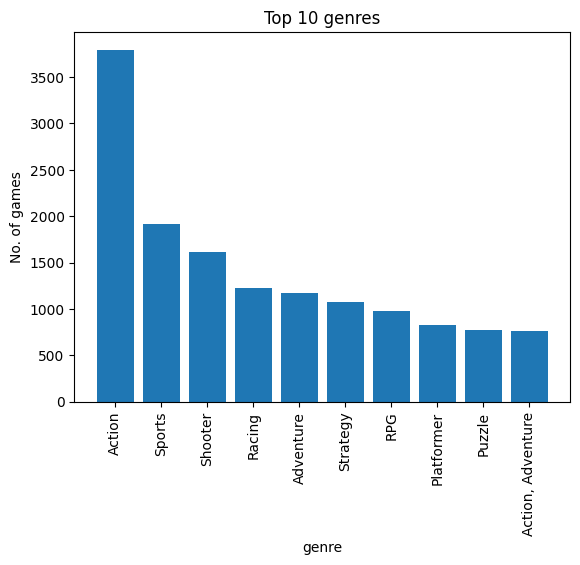

In [32]:
plt.bar(distribution_of_genre.index, distribution_of_genre.values)
plt.xticks(rotation=90)
plt.xlabel("genre")
plt.ylabel("No. of games")
plt.title("Top 10 genres")

### Editor's choice games

In [35]:
Editors_choice_games = df['editors_choice'].value_counts()
Editors_choice_games

editors_choice
N    15108
Y     3517
Name: count, dtype: int64

<BarContainer object of 2 artists>

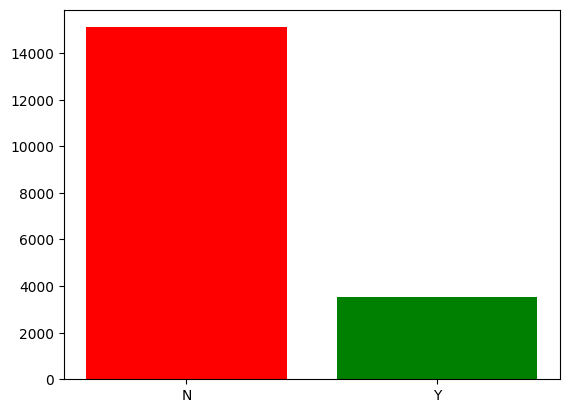

In [38]:
plt.bar(Editors_choice_games.index, Editors_choice_games.values, color=['red', 'green'])

### Distribution of games with years

In [40]:
releaseyear_games = df['release_year'].value_counts()
releaseyear_games

release_year
2008    1915
2009    1687
2007    1610
2010    1363
2006    1208
2005    1088
2011    1073
2000    1045
2004     997
2003     969
2002     936
1999     775
2012     753
2013     696
2001     688
2014     537
2015     365
1998     339
2016     226
1997     205
1996     149
1970       1
Name: count, dtype: int64

Text(0, 0.5, 'No. of games')

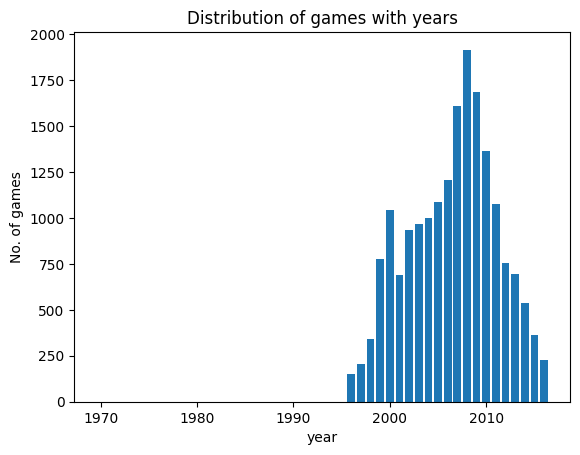

In [44]:
plt.bar(releaseyear_games.index, releaseyear_games.values)
plt.title("Distribution of games with years")
plt.xlabel("year")
plt.ylabel("No. of games")

2008 year observed the most game release year with 1915 number of games.

### Most popular release month

In [45]:
df['release_month'].value_counts()

release_month
11    2657
10    2310
9     1707
3     1573
12    1505
6     1483
8     1338
2     1327
4     1264
7     1190
5     1143
1     1128
Name: count, dtype: int64

November is the most popular month

### Top 10 platforms according to avg. score of each platform

In [54]:
avg_score_platform = df.groupby('platform')['score'].mean()[:10].sort_values(ascending=False)
avg_score_platform

platform
Atari 5200             8.000000
Game Boy               7.813636
Android                7.546154
Dreamcast              7.370280
Game Boy Advance       6.626645
Commodore 64/128       6.416667
Arcade                 6.036364
Atari 2600             5.900000
Dreamcast VMU          3.000000
DVD / HD Video Game    1.000000
Name: score, dtype: float64

In [55]:
plt.bar(avg_score_platform.index, avg_score_platform.values)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Atari 5200'),
  Text(1, 0, 'Game Boy'),
  Text(2, 0, 'Android'),
  Text(3, 0, 'Dreamcast'),
  Text(4, 0, 'Game Boy Advance'),
  Text(5, 0, 'Commodore 64/128'),
  Text(6, 0, 'Arcade'),
  Text(7, 0, 'Atari 2600'),
  Text(8, 0, 'Dreamcast VMU'),
  Text(9, 0, 'DVD / HD Video Game')])

Atari 5200 has the highest avg. score